In [27]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import math

# create a time series signal by superposing sin waves

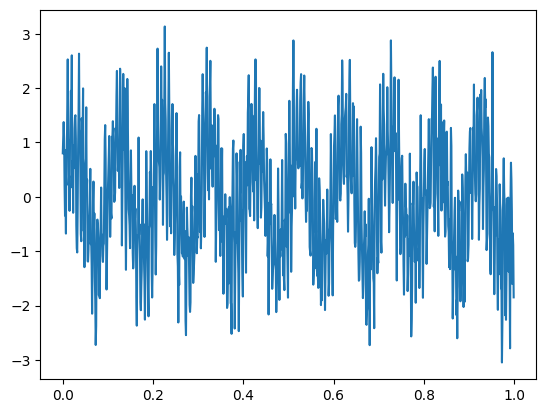

In [2]:
# sampling rate in Hz
rate = 1000
dt = 1 / rate

# Duration of the signal 
signal_dur = 1.0

# signal amplitudes
amplitudes = [1.0, 1.0]

# signal frequencies in Hz
freqs = [10, 120]

# compute the timepoints at which sampling occurs
t = np.arange(0.0, signal_dur, dt)
N = len(t)

# create the signa;
sig = np.zeros_like(t)

for (ampl, freq) in zip(amplitudes, freqs):
    omega = 2 * np.pi * freq
    sig += ampl * np.sin(omega*t)

y = sig

# add noise
y += 0.5*np.random.randn(N) 


plt.plot(t, y)
plt.show()

# Compute the fft

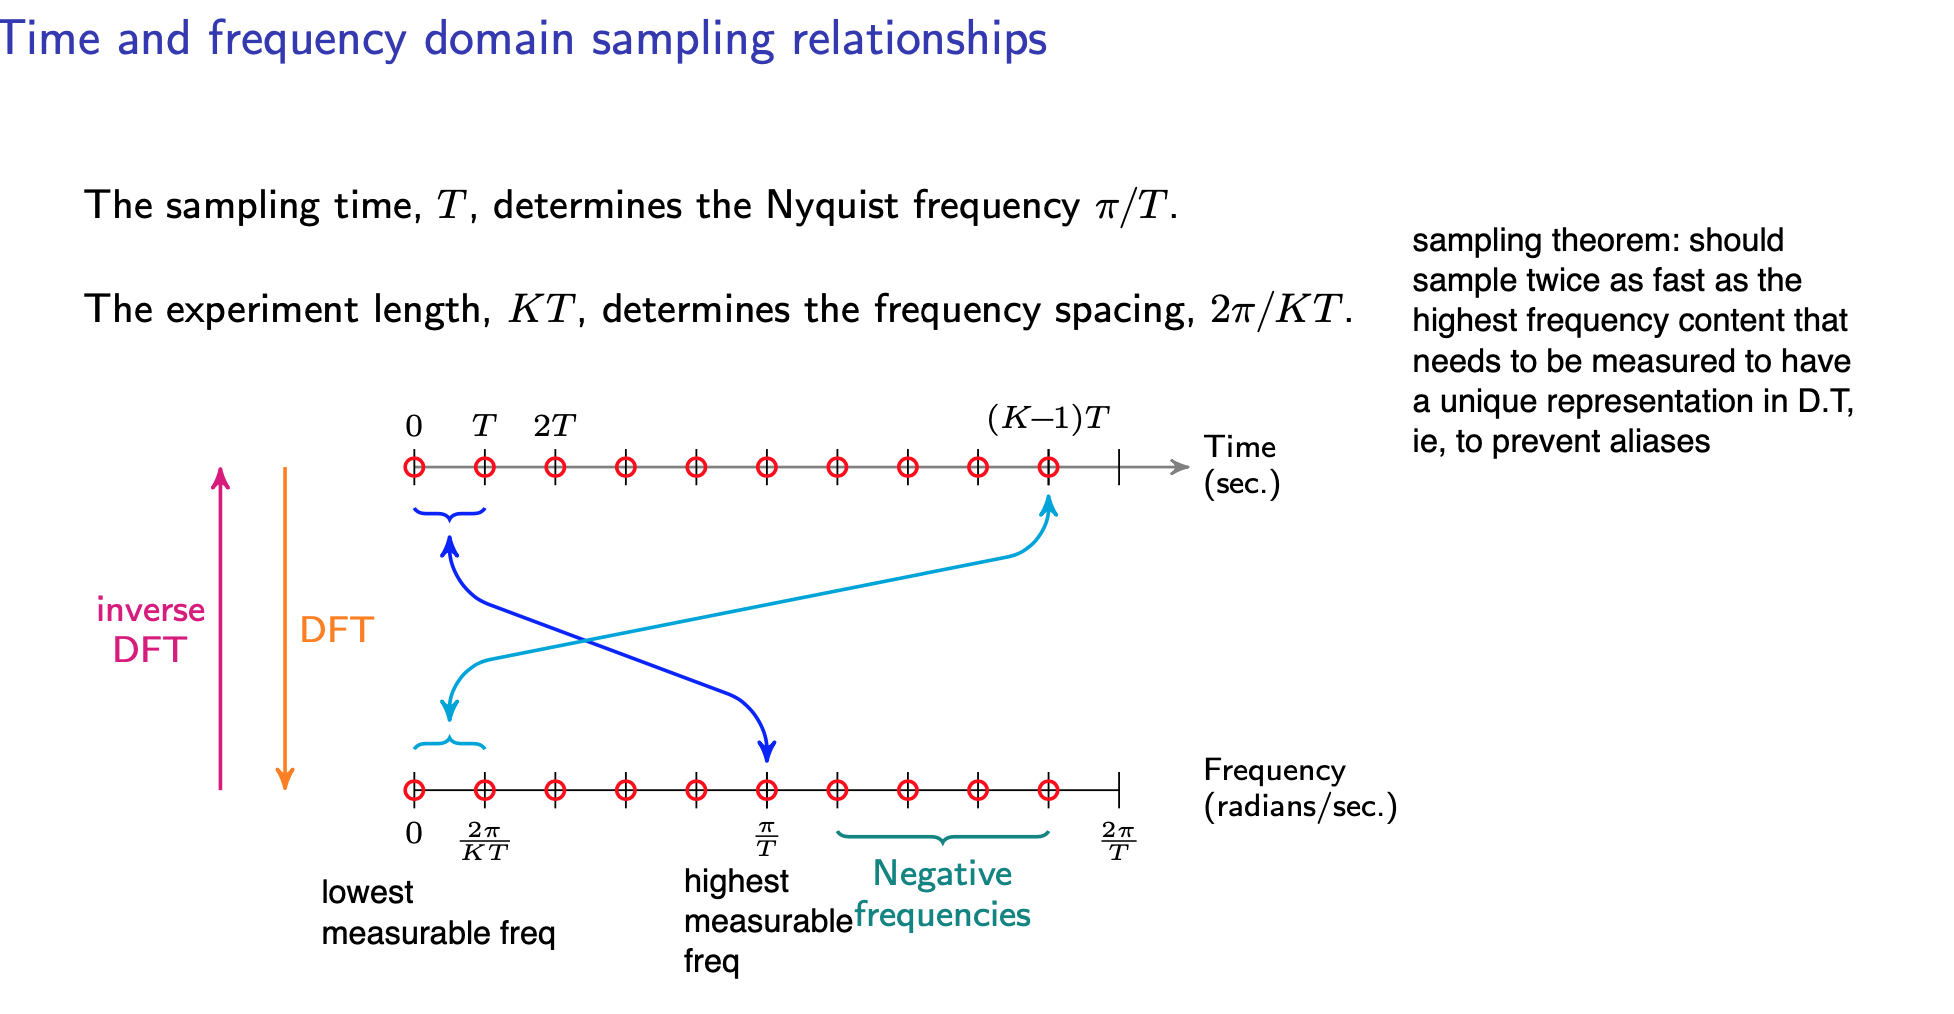

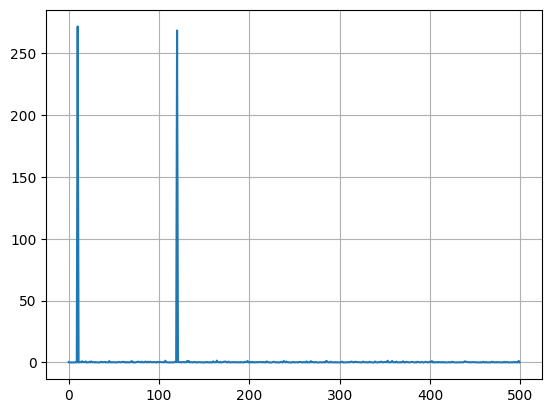

In [3]:
f_hat = fftpack.fft(y)

# We consider only the first half of the frequencies(see image), the other half is just it's complex conjugate
f_hat_first_half = f_hat[:N//2]

# compute power spectrum from the F.T coefficients 
power_spectrum = np.abs(f_hat_first_half)**2 / N

# compute corresponding frequencies
xf = fftpack.fftfreq(N, dt)[:N//2]

plt.plot(xf, power_spectrum)
plt.grid()
plt.show()

## Check if sampling rate enough according to sampling theorem

In [4]:
# highest frequency content to be measures
omega_max = max(freqs)

rate_req =  math.ceil(omega_max*2*np.pi)

if(rate < rate_req):
    print("Sampling rate too low, required is", rate_req, "Hz")
else:
    print("Sampling rate of" , rate, "Hz ", "is sufficient, minimum required is", "%.2f"%rate_req, "Hz")

Sampling rate of 1000 Hz  is sufficient, minimum required is 754.00 Hz


## Interpreting the fourier coefficients 

* The number of fourer coefficients is equal to the number of data samples
* The magn of te fourier coeff at each freq represets the aplitude at that freq, and the angle gives the phase shift
* The second coeff corresponds to the lowest measurable frequnecy, and the middle coeff is the highest measurable freq containing new information(nyquist freq, see image). 

The first 3 fourier coefficients are:

In [5]:
f_hat_first_half[:3]

array([-18.25773523-0.j        ,  -5.4483525 +3.55231806j,
        -2.78016429-2.47730735j])

The amplitude, phase and power at each frequency are 

In [6]:
amplitude_f_hat =  np.abs(f_hat_first_half)
phase_f_hat = np.angle(f_hat_first_half)
power_f_hat =  np.abs(f_hat_first_half)**2

Analytical formula for the lowest and highest measurable frequencies

In [7]:
# compute the frequency at that index 
lowest_measurable_freq_in_rad = (2*np.pi) / (N*dt)
lowest_measurable_freq_in_hz = 1/ (N*dt)

highest_measurable_freq_in_rad = np.pi / dt
highest_measurable_freq_in_hz = 1/ (2*dt)

lowest_measurable_freq_in_hz, highest_measurable_freq_in_hz

(1.0, 500.0)

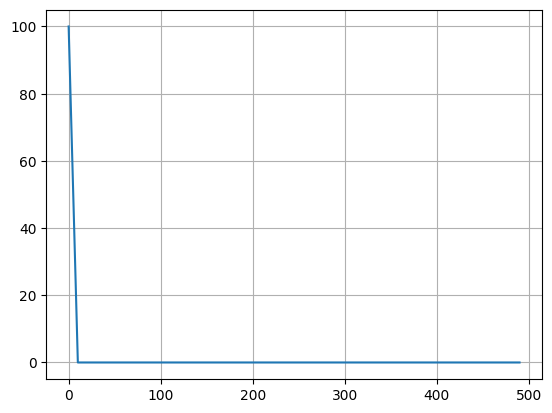

In [31]:
N = 100
u = np.ones(N)
f_hat = fftpack.fft(u)

# We consider only the first half of the frequencies(see image), the other half is just it's complex conjugate
f_hat_first_half = f_hat[:N//2]

# compute power spectrum from the F.T coefficients 
power_spectrum = np.abs(f_hat_first_half)**2 / N

xf = fftpack.fftfreq(N, dt)[:N//2]

plt.plot(xf, power_spectrum)
plt.grid()
plt.show()